<a href="https://colab.research.google.com/github/ez3anech3/ez3anech3/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

These are commands to install devices I will use to analyse my dataset.

In [ ]:
Capstone_df = pd.read_csv('/content/fao_data_land_data.csv')
Capstone_df.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,11,Area,2007.0,1000 Ha,38661.0,Q,agricultural_area
1,Afghanistan,11,Area,2006.0,1000 Ha,38659.0,Fm,agricultural_area
2,Afghanistan,11,Area,2005.0,1000 Ha,38515.0,Fm,agricultural_area
3,Afghanistan,11,Area,2004.0,1000 Ha,38064.0,Fm,agricultural_area
4,Afghanistan,11,Area,2003.0,1000 Ha,38899.0,Fm,agricultural_area


Now, we are looking at an overview of our dataframe, not much information can be curated from this which leads us to our next step.


In [ ]:
Capstone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104784 entries, 0 to 104783
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country_or_area  104784 non-null  object 
 1   element_code     104784 non-null  object 
 2   element          104659 non-null  object 
 3   year             104659 non-null  float64
 4   unit             104659 non-null  object 
 5   value            104659 non-null  float64
 6   value_footnotes  104658 non-null  object 
 7   category         104784 non-null  object 
dtypes: float64(2), object(6)
memory usage: 6.4+ MB


In [ ]:
Capstone_df.describe()

,year,value
count,104659.000000,1.046590e+05
mean,1986.262987,8.988558e+04
std,13.828320,5.247164e+05
min,1961.000000,0.000000e+00
25%,1974.000000,7.500000e+01
50%,1988.000000,1.600000e+03
75%,1998.000000,1.695560e+04
max,2007.000000,1.344603e+07


In [ ]:
Capstone_df.value_footnotes.unique()

array(['Q ', 'Fm', 'F ', 'A ', 'I ', 'W ', 'E ', nan], dtype=object)

If you had noticed there was a column called value_footnote and under it these are the values that have been placed under it as a key to what the value of 1000Ha of land is in USD.
These are the Key and their meanings as below:

1.   W : Data published on the official website or publications,
2.   E : Expert sources from FAO(Food and Agriculture Organization),
3.   I : Country data reported by international Organizations
4.   A : Official, semi official or estimated data
5.   F : FAO estimate
6.   Q : Official data from FAO questionnaires in that country
7.   Fm : Manual estimation


In [ ]:
print("The dataset contains", Capstone_df.shape[0], "rows and", Capstone_df.shape[1], "columns")

The dataset contains 104784 rows and 8 columns


Now a quick and concise viewing of our data. I am hoping to determine which part of the world has the most afffordable land.

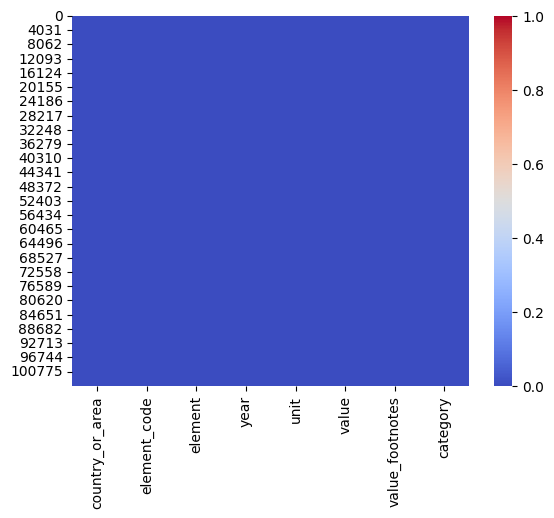

In [ ]:
sns.heatmap(Capstone_df.isnull(),cmap="coolwarm")
plt.show()

This heatmap tells me there are no missing values in my dataset and I can proceed with analysis.

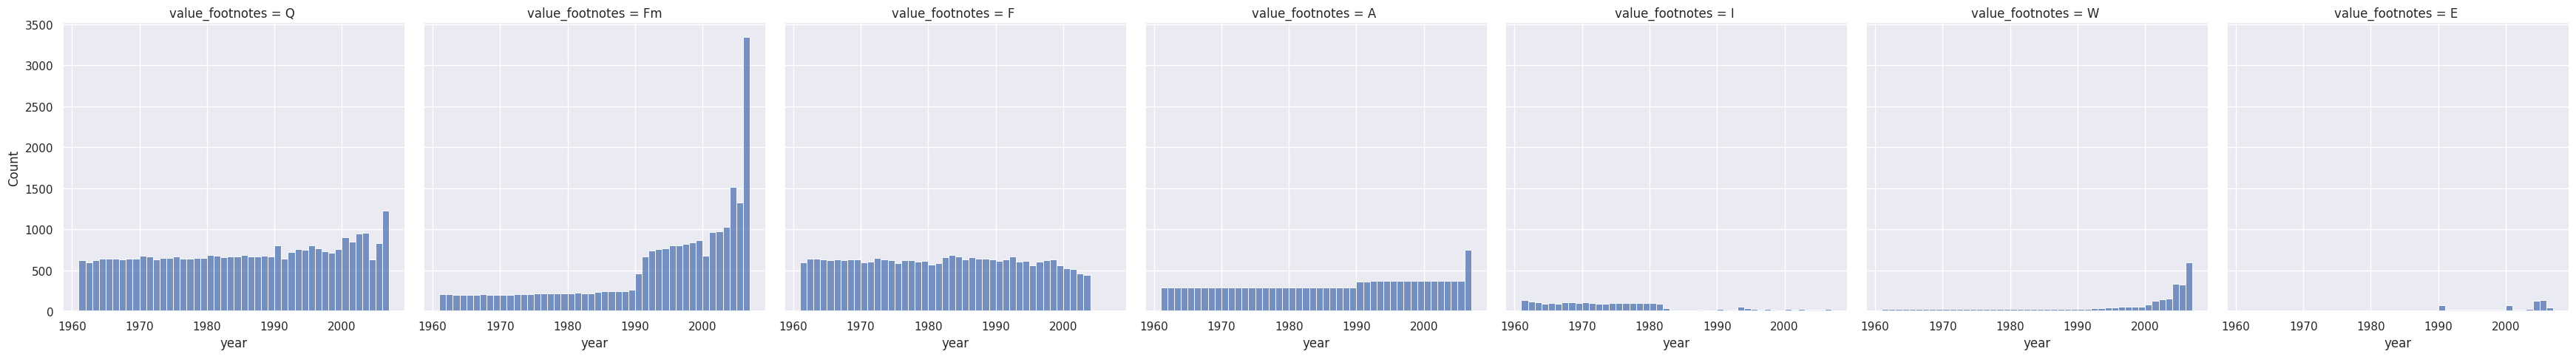

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(Capstone_df,
             x = 'year',
             col = 'value_footnotes')
plt.show()

These are the counts of all the years that were curated from a footnote. From Inference, I can see the footnote 'E' (estimated values) is the smallest most likely as to avoid error but to fill in missing variables. Moreover, 'W'(official websites) and 'I'(international organizations) are also low. However, the majority of data comes from FAO itself.

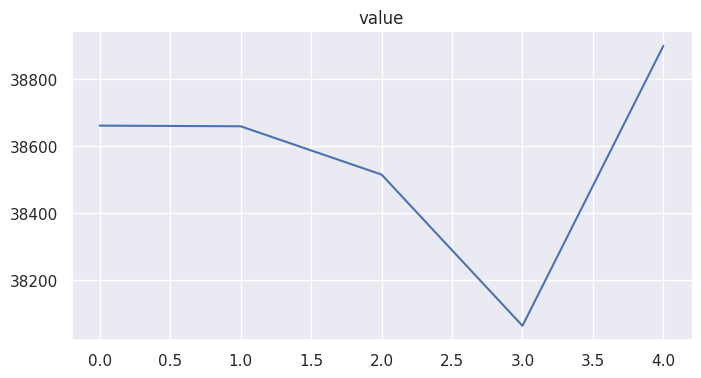

In [ ]:
from matplotlib import pyplot as plt
_df_12['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

This is a plot of the value of the land against the count. Incidentally, a large portion of the land is below $38200 for 1000Ha. Finding which countries are within the price range will give the most value for your money.